### Importing and reading data

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [113]:
df=pd.read_csv('train.csv')

### Exploratory Data Analysis

In [114]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [115]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


#### To find missing values

In [117]:
df.dropna(inplace=True)
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

#### To find duplicates

In [118]:
df.duplicated().sum()

4325

In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.duplicated().sum()

0

#### Bivariate Analysis

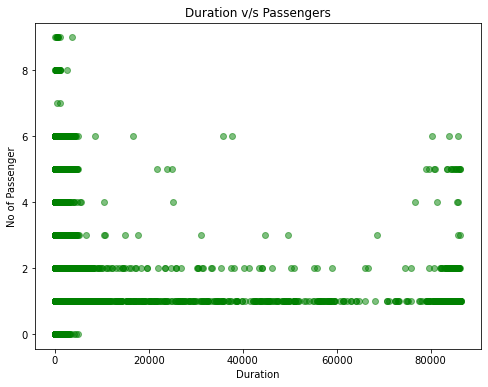

In [121]:
x=df['trip_duration']
y=df['num_of_passengers']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='green',alpha=0.5)
plt.title('Duration v/s Passengers')
plt.xlabel('Duration')
plt.ylabel('No of Passenger')
plt.show()

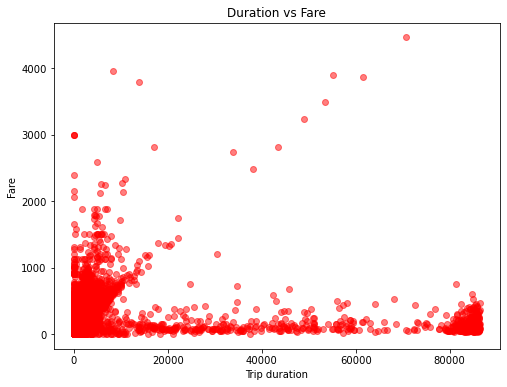

In [122]:
x=df['trip_duration']
y=df['fare']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='red',alpha=0.5)
plt.title('Duration vs Fare')
plt.xlabel('Trip duration')
plt.ylabel('Fare')
plt.show()

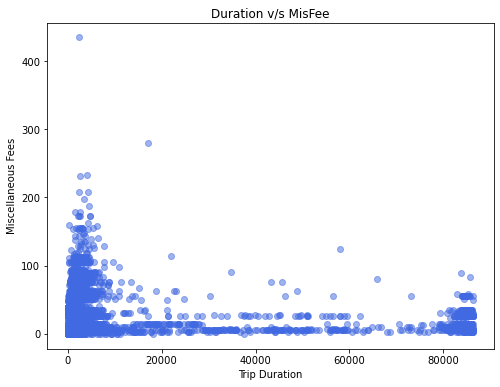

In [123]:
x=df['trip_duration']
y=df['miscellaneous_fees']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='royalblue',alpha=0.5)
plt.title('Duration v/s MisFee')
plt.xlabel('Trip Duration')
plt.ylabel('Miscellaneous Fees')
plt.show()

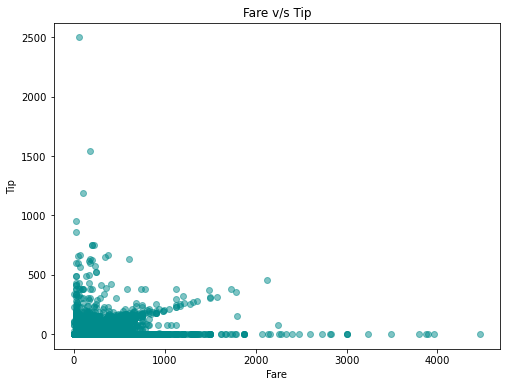

In [124]:
x=df['fare']
y=df['tip']
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='darkcyan',alpha=0.5)
plt.title('Fare v/s Tip')
plt.xlabel('Fare')
plt.ylabel('Tip')
plt.show()

#### Outlier detection using visualization

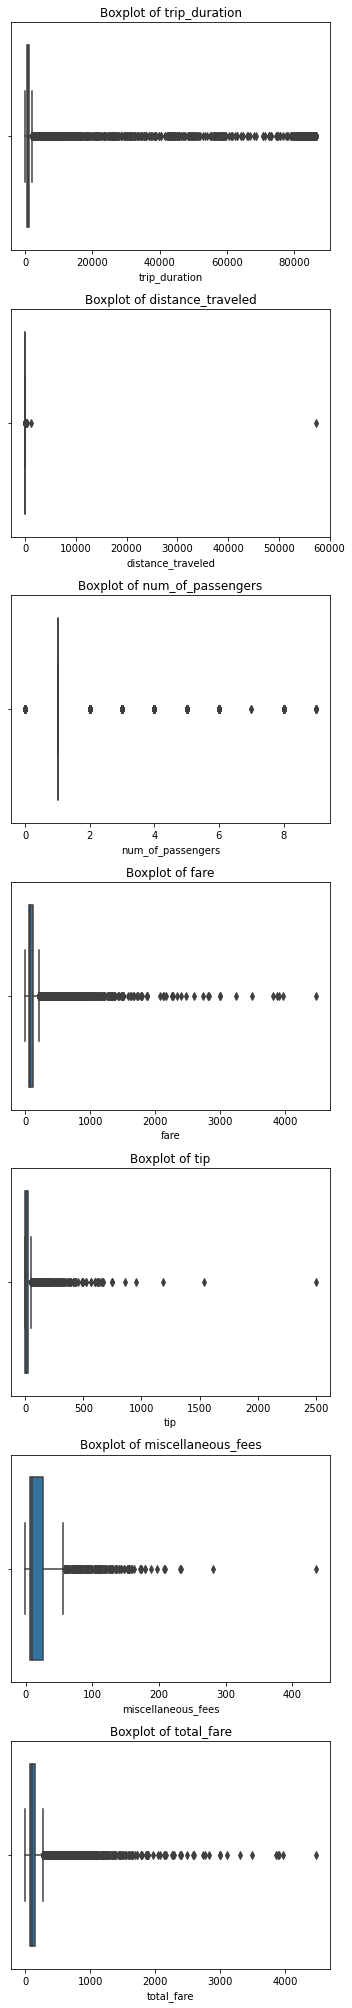

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns you want to create boxplots for
columns_of_interest = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_of_interest), figsize=(5, 4 * len(columns_of_interest)))

# Iterate through the columns and create boxplots
for i, col in enumerate(columns_of_interest):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


#### Outlier detection using z-score

In [126]:
columns_of_interest = ['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']
outlier={}
for column in columns_of_interest:
    z_score=stats.zscore(df[column])
    is_outlier=(z_score>3) | (z_score<-3)
    outlier[column]=df[column][is_outlier]

for column, outlier_value in outlier.items():
    #print(f"Outliers of '{column}':")
    #print(outlier_value)
    print("Number of outliers:",len(outlier_value))
    print()
    

Number of outliers: 893

Number of outliers: 2

Number of outliers: 8126

Number of outliers: 3578

Number of outliers: 2565

Number of outliers: 4641

Number of outliers: 3340



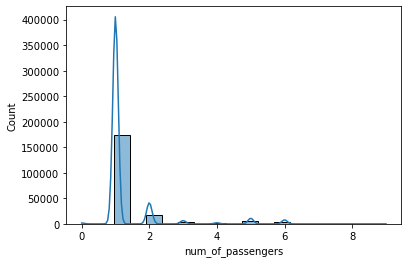

In [127]:
sns.histplot(data=df,x='num_of_passengers',kde=True)
plt.show()

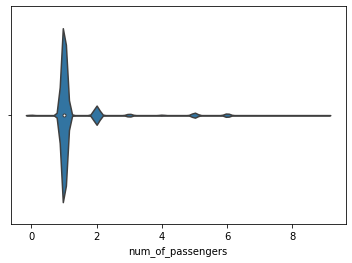

In [128]:
sns.violinplot(x='num_of_passengers', data=df)
plt.show()

In [129]:

data_distance=df['distance_traveled']
# Calculate mean and standard deviation for each column
mean = data_distance.mean()
std_dev = data_distance.std()

# Calculate Z-scores for the entire DataFrame
z_scores = (data_distance - mean) / std_dev

print(z_scores)


0        -0.018756
1        -0.013382
2        -0.015832
3         0.004006
4        -0.023972
            ...   
209668    0.026056
209669   -0.030295
209670   -0.018203
209671   -0.023419
209672    0.226011
Name: distance_traveled, Length: 205348, dtype: float64


In [130]:
# Create a box plot of Z-scores
'''plt.figure(figsize=(8, 6))
z_scores.plot()
plt.title('Box Plot of Z-Scores')
plt.ylabel('Z-Score')
plt.xlabel('Columns')
plt.show()'''

"plt.figure(figsize=(8, 6))\nz_scores.plot()\nplt.title('Box Plot of Z-Scores')\nplt.ylabel('Z-Score')\nplt.xlabel('Columns')\nplt.show()"

In [131]:
a='fare'
b='tip'
pear_corr_coeff=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a) +" and "+ str(b)+":",pear_corr_coeff )

Correlation Coefficient for fare and tip: 0.29785108672246075


In [132]:
b='distance_traveled'
a='fare'
pear_corr_coeff=df[a].corr(df[b],method='pearson')
print("Correlation Coefficient for "+ str(a) +" and "+ str(b)+":",pear_corr_coeff )

Correlation Coefficient for fare and distance_traveled: 0.03574001851608133


### Model Selection

#### Linear Regression

In [133]:
X=df[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees','surge_applied']]
y=df['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

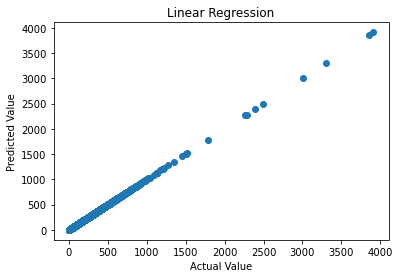

In [134]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression')
plt.show()

In [135]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

5.0026808510614284e-26


#### K-Nearest Neighbors

In [137]:
X=df[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare', 'tip', 'miscellaneous_fees','surge_applied']]
y=df['total_fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
dtree=DecisionTreeRegressor(random_state=0)
dtree.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [138]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (164278, 7)
Shape of y_train: (164278,)
Shape of X_test: (41070, 7)
Shape of y_test: (41070,)


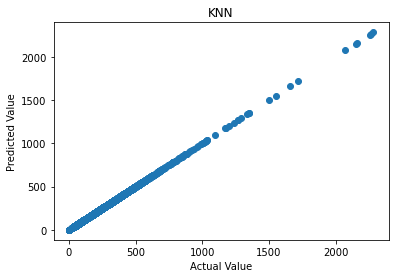

In [139]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('KNN')
plt.show()

In [140]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

4.619864157281702e-26
